In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('sample_stocks.csv')
x = data['returns']
y = data['dividendyield']

In [3]:
data.describe()

,returns,dividendyield
count,648.000000,648.000000
mean,10.354938,2.434568
std,19.552899,1.645191
min,-20.000000,0.000000
25%,-10.000000,0.700000
50%,10.500000,2.500000
75%,31.000000,4.100000
max,40.000000,4.900000


In [4]:
data.head()

,returns,dividendyield
0,-19,0.0
1,-13,0.0
2,-14,0.0
3,-9,0.0
4,-19,0.0


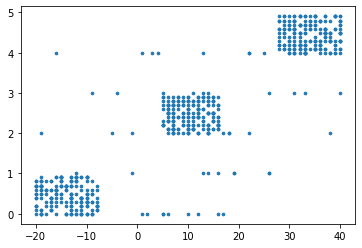

In [5]:
plt.scatter(x, y, s = 7)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state = 101)

In [7]:
scaler = StandardScaler()
scaler.fit(data)
ds = scaler.transform(data)

In [8]:
x = []
y = []
for linha in ds:
    x.append(linha[0])
    y.append(linha[1])

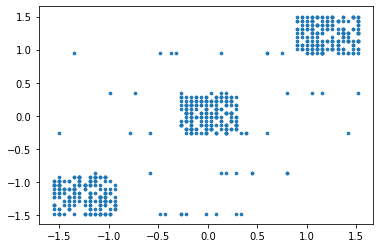

In [9]:
plt.scatter(x, y, s = 7)

[[ 0.01143028 -0.00489449]
 [ 1.20067006  1.21012806]
 [-1.21324883 -1.20474178]]


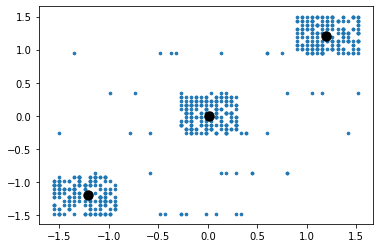

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
kmeans = kmeans.fit(ds)
centroids = kmeans.cluster_centers_

print(centroids)

plt.scatter(x, y, s = 7)

for a in centroids:
    plt.scatter(a[0], a[1], c = 'black', s = 87)

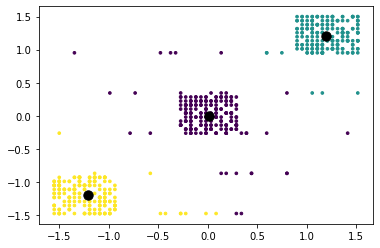

In [11]:
plt.scatter(x, y, s = 7, c = kmeans.labels_)

for x in centroids:
    plt.scatter(x[0], x[1], c = 'black', s = 87)

1 1296.0
2 386.98068568789614
3 77.62109287678899
4 61.645431515125466
5 53.960523812211335
6 47.82640917874578
7 41.854500966782055
8 37.18659699591471
9 33.20823708059601


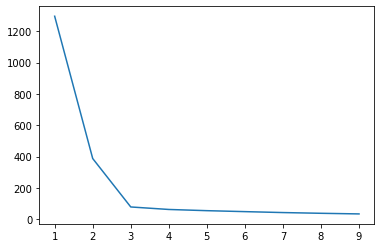

In [15]:
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(ds)
    print(i,kmeans.inertia_)
    inertia.append(kmeans.inertia_)  
plt.plot(range(1, 10), inertia)
plt.show()